In [213]:
# %load 'common.py'
import random
import copy


def gen_data(num, min=10, max=1000):
    data = []
    for x in range(num):
        data.append(random.randint(min, max))
    return data

def shuffle(l):
    l = clone(l)
    random.shuffle(l)
    return l

def sort(l):
    l = clone(l)
    l.sort()
    return l

def clone(o):
    return copy.deepcopy(o)

def br():
    print ('-' * 80)


In [214]:
# %load 'graph.py'
import matplotlib.pyplot as plt
import graphviz


class ArrayGraph:

    def __init__(self, A):
        self.A = A
        self.G = graphviz.Digraph('structs', node_attr = { 'shape': 'plaintext' })

    def draw(self):
        s = '<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0"><TR>'
        for x in self.A:
            s += '<TD>%s</TD>' % str(x)

        s += '</TR></TABLE>>'

        self.G.node('struct1', s)
        display(self.G)
        

def draw_array(label, A):
    if label != None and label != '':
        print(label)

    arrayGraph = ArrayGraph(A)
    arrayGraph.draw()


class TreeGraph:

    def __init__(self, tree):
        self.tree = tree

        self.G = graphviz.Graph()

    def node(self, node):
        self.G.node(str(id(node)), label = str(node))

    def edge(self, node1, node2):
        self.G.edge(str(id(node1)), str(id(node2)))

    def walk(self, x = None):
        if x == None:
            x = self.tree.root

        if x == None:
            return

        self.node(x)

        if x.left != None:
            self.node(x.left)
            self.edge(x, x.left)

            self.walk(x.left)
        
        if x.right != None:
            self.node(x.right)
            self.edge(x, x.right)

            self.walk(x.right)

    def draw(self):
        self.walk()
        display(self.G)
        

def draw_tree(label, A):
    if label != None and label != '':
        print(label)

    treeGraph = TreeGraph(A)
    treeGraph.draw()



In [215]:
class Node:
    
    def __init__(self, k):
        self.key = k
        self.left = self.right = self.p = None
    
    def copySatelliteData(self, o):
        pass
    
    def __str__(self):
        return str(self.key)
    

In [216]:
class BinarySearchTree:
    
    def __init__(self):
        self.root = None
    
    def search(self, k):
        x = self.root
        
        while x != None and x.key != k:
            if k < x.key:
                x = x.left
            else:
                x = x.right
        
        return x

    def minimum(self, x = None):
        if x is None:
            x = self.root
        
        while x != None and x.left != None:
            x = x.left
        
        return x

    def maximum(self, x = None):
        if x is None:
            x = self.root
        
        while x != None and x.right != None:
            x = x.right
        
        return x

    def successor(self, x):
        if x.right != None:
            return self.minimum(x.right)
        
        y = x.p
        while y != None and x == y.right:
            x = y
            y = y.p
    
        return y
    
    def predecessor(self, x):
        if x.left != None:
            return self.maximum(x.left)
        
        y = x.p
        while y != None and x == y.left:
            x = y
            y = y.p
    
        return y
    
    def insert(self, z):
        y = None
        x = self.root
        
        while x != None:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        
        z.p = y
        if y == None:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
    
    def delete(self, z):
        if z.left == None or z.right == None:
            y = z
        else:
            y = self.successor(z)
        
        if y.left != None:
            x = y.left
        else:
            x = y.right
        
        if x != None:
            x.p = y.p
        
        if y.p == None:
            self.root = x
        elif y == y.p.left:
            y.p.left = x
        else:
            y.p.right = x
        
        if y != z:
            z.key = y.key
            y.copySatelliteData(z)
        
        return y
            
    def walk(self, x = None, deep = 1, space = 3):
        if x == None:
            x = self.root
        
        if x == None:
            return
    
        print('{}{}{}'.format(deep, '+' * space, x.key))
        
        if x.left != None:
            self.walk(x.left, deep + 1, space + 3)
        
        if x.right != None:
            self.walk(x.right, deep + 1, space + 3)
    


original:


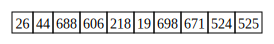

In [217]:
n = 10
data = gen_data(n)


draw_array('original:', data)


sorted:


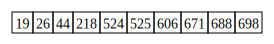

In [218]:
sorted_data = sort(data)
draw_array('sorted:', sorted_data)


tree:


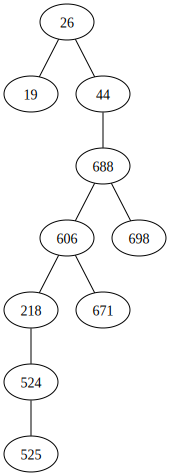

In [219]:
t = BinarySearchTree()


for x in data:
    t.insert(Node(x))
    
draw_tree('tree:', t)


In [220]:
k = data[n // 2]

x = t.search(k)
print ('search({}):'.format(k), x)


search(19): 19


In [221]:
predecessor = t.predecessor(x)
print ('predecessor({}):'.format(k), predecessor)

successor = t.successor(x)
print ('successor({}):'.format(k), successor)

print ('minimum:', t.minimum())

print ('maximum:', t.maximum())


predecessor(19): None
successor(19): 26
minimum: 19
maximum: 698


delete(606): 671


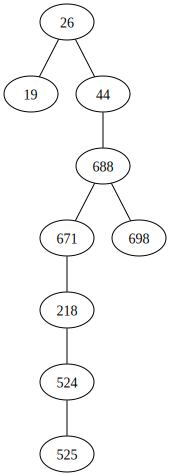

--------------------------------------------------------------------------------
delete(218): 218


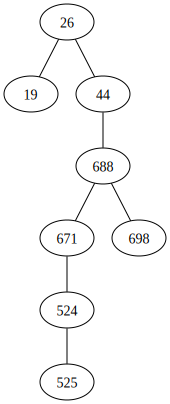

--------------------------------------------------------------------------------
delete(688): 698


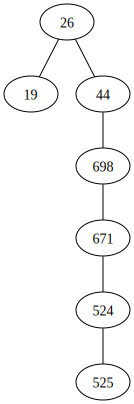

--------------------------------------------------------------------------------
delete(26): 44


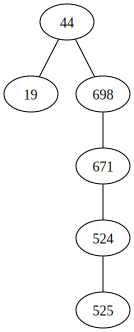

--------------------------------------------------------------------------------
delete(671): 671


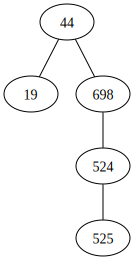

--------------------------------------------------------------------------------
delete(44): 524


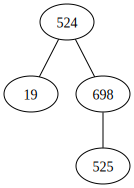

--------------------------------------------------------------------------------
delete(19): 19


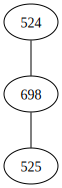

--------------------------------------------------------------------------------
delete(524): 524


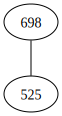

--------------------------------------------------------------------------------
delete(525): 525


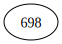

--------------------------------------------------------------------------------
delete(698): 698


--------------------------------------------------------------------------------


In [222]:
shuffled_data = shuffle(data)
for k in shuffled_data:
    x = t.search(k)    
    t.delete(x)
    
    draw_tree('delete({}): {}'.format(k, x), t)
    br()
